# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import mysql.connector as ms

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Data

In [2]:
df_info_clients = pd.read_csv('data/clients_informations.csv')

### 2.1 Data Summary: 
- **Amostra:** id

- **id_cliente:** client id

- **id_unico_cliente:**: client specific id

- **item-id:** product id

- **cep_cliente:** client's postal code

- **cidade cliente:** client's city

- **estado_cliente:** client's state

- **id_pedido:** order id

- **status_pedido:** order's status

- **horario pedido:** date and time that order was made by the client

- **pedido_aprovado:** date and time that the order was approved in the website

- **pedido_entregador:** date and time that the order was leaving for delivery

- **pedido_entregue:** date and time that the order was delivery to the client

- **data_estimada:** estimate date that the order will arrive to the client

- **id_vendedor:** salesman's id

- **preco:** price of the order in reais (R$)

- **frete:** delivery's price

- **pagamento_sequencial:**

- **pagamento_tipo:** which method the client chose to pay

- **pagamento_prestacoes:** number of parcels that the client will pay the order's value

- **pagamento_valor:** order's price + dlivery's price

- **review:** stars rating of the client

- **categoria:** product's category

- **categoria_ingles:** product's category in english

- **cep_vendedor:** salesman postal code

- **cidade_vendedor:** salesman city

- **estado_vendedor:** sales person state


In [3]:
df_info_clients.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


### 2.2 Rename Columns

In [4]:
new_columns = [ 'id',  'client_id', 'client_specific_id', 'item_id', 'client _postal_code', 'client_city', 'client_state', 'order_id', 'order_status', 'order_date', 'order_approved', 'order_dliveryman',
               'order_delivery', 'order_estimated', 'salesman_id', 'order_price', 'delivery_price', 'sequence_pay', 'paymeny_type', 'divided_pay', 'total_price', 'review', 'category', 'category_english',
               'salesman_postal', 'salesman_city', 'salesman_state']

df_info_clients.columns = new_columns

### 2.3 Data Caracteristics

In [5]:
print('Number of Rows: {}'.format( df_info_clients.shape[0] ) )
print( 'Number of Columns: {}'.format( df_info_clients.shape[1] ) )

Number of Rows: 116581
Number of Columns: 27


In [75]:
print('Data Types')
df_info_clients.dtypes

Data Types


id                                        int64
client_id                                object
client_specific_id                       object
item_id                                   int64
client _postal_code                       int64
client_city                              object
client_state                             object
order_id                                 object
order_status                             object
order_date                       datetime64[ns]
order_approved                   datetime64[ns]
order_dliveryman                         object
order_delivery                   datetime64[ns]
order_estimated                  datetime64[ns]
salesman_id                              object
order_price                             float64
delivery_price                          float64
sequence_pay                              int64
paymeny_type                             object
divided_pay                               int64
total_price                             

In [7]:
df_info_clients[["order_date"]] = df_info_clients[["order_date"]].apply(pd.to_datetime)

In [8]:
print("Check Null Values")
df_info_clients.isna().sum()

Check Null Values


id                        0
client_id                 0
client_specific_id        0
item_id                   0
client _postal_code       0
client_city               0
client_state              0
order_id                  0
order_status              0
order_date                0
order_approved           14
order_dliveryman       1213
order_delivery         2515
order_estimated           0
salesman_id               0
order_price               0
delivery_price            0
sequence_pay              0
paymeny_type              0
divided_pay               0
total_price               0
review                    0
category                  0
category_english          0
salesman_postal           0
salesman_city             0
salesman_state            0
dtype: int64

In order to analyse the null values, I will create a query to count the status of them

In [9]:
mask = df_info_clients['order_approved'].isnull() | df_info_clients['order_dliveryman'].isnull() | df_info_clients['order_delivery'].isnull()

# group the rows by order_status and count the ids for each order_status
result = df_info_clients[mask].groupby('order_status')['id'].count()

In [10]:
result

order_status
approved          3
canceled        546
delivered        23
invoiced        364
processing      362
shipped        1225
unavailable       7
Name: id, dtype: int64

In [11]:
# In SQL
#query = """
#SELECT order_status, 
#COUNT(id)
#FROM df_info_clients
#WHERE order_approved IS NULL
#OR order_dliveryman IS NULL
#OR order_delivery IS NULL
#GROUP BY order_status
#"""
#ps.sqldf(query, locals())


mask = df_info_clients['order_approved'].isnull() | df_info_clients['order_dliveryman'].isnull() | df_info_clients['order_delivery'].isnull()
df_info_clients[mask].groupby('order_status')['id'].count()

order_status
approved          3
canceled        546
delivered        23
invoiced        364
processing      362
shipped        1225
unavailable       7
Name: id, dtype: int64

In [12]:
#In SQL
#query = """select * from df_info_clients
#where (order_approved is null or order_dliveryman is null or order_delivery is null) and order_status = 'delivered'  
#"""
#ps.sqldf(query, locals()).iloc[:, 8:14]

df_info_clients[(df_info_clients['order_approved'].isnull() | df_info_clients['order_dliveryman'].isnull() | df_info_clients['order_delivery'].isnull()) & (df_info_clients['order_status'] == 'delivered')].iloc[:, 8:14]

,order_status,order_date,order_approved,order_dliveryman,order_delivery,order_estimated
16871,delivered,2017-02-18 15:52:27,NaN,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00
16920,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
16993,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
33010,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38344,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48622,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
57919,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
59100,delivered,2017-02-18 22:49:19,NaN,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00
59101,delivered,2017-02-18 22:49:19,NaN,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00
62426,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00


It is possible to see that only 23 of the null values are erros, because the status is "delivered" but they do not have: 
- the date of order approval 

or 
- the date that the order was leaving for delivery 

or 
- the date that the order was delivery to the client

For this reason, I will delete these values.

In [13]:
#query = """select * from df_info_clients
#where (order_approved is not null 
#and order_dliveryman is not null 
#and order_delivery is not null)
#or order_status <> 'delivered';
#"""
#df_info_clients = ps.sqldf(query, globals())


df_info_clients = df_info_clients[(df_info_clients['order_approved'].notnull() & df_info_clients['order_dliveryman'].notnull() & df_info_clients['order_delivery'].notnull()) | (df_info_clients['order_status'] != 'delivered')]

# 3. Exploratory Data Analysis
In order to understand and get more familiar with the dataset, I will perform a exploratory data analysis.

### 3.1) Categorical variables

#### 3.1.1) Item ID

Percentage of items most bought 
1     0.88
2     0.09
3     0.02
4     0.01
5     0.00
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
15    0.00
16    0.00
17    0.00
18    0.00
19    0.00
20    0.00
21    0.00
Name: item_id, dtype: float64


<Axes: xlabel='item_id', ylabel='count'>

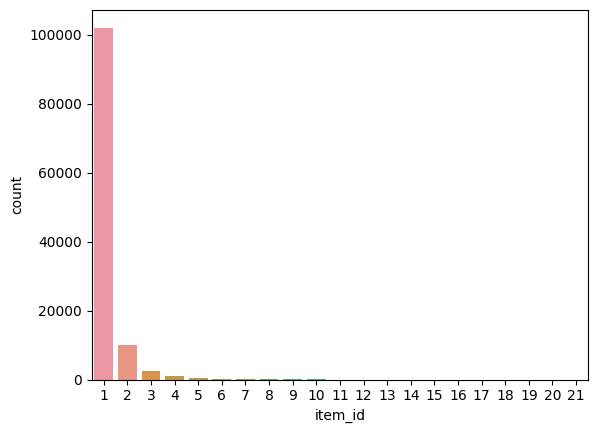

In [14]:
print("Percentage of items most bought ")
print(round(df_info_clients['item_id'].value_counts(normalize=True),2))
sns.countplot(data=df_info_clients, x="item_id")

The Item with ID 1 represents 88% of the sales

NAO FAZ O MENOR SENTIDO ESSE ITEM ID

#### 3.1.2) City

Cities that buys the most
sao paulo                18411
rio de janeiro            8121
belo horizonte            3218
brasilia                  2452
curitiba                  1799
campinas                  1722
porto alegre              1640
salvador                  1498
guarulhos                 1387
sao bernardo do campo     1100
Name: client_city, dtype: int64
 
Percentage of cities that buys the most
sao paulo                0.157956
rio de janeiro           0.069673
belo horizonte           0.027609
brasilia                 0.021037
curitiba                 0.015434
campinas                 0.014774
porto alegre             0.014070
salvador                 0.012852
guarulhos                0.011900
sao bernardo do campo    0.009437
Name: client_city, dtype: float64


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

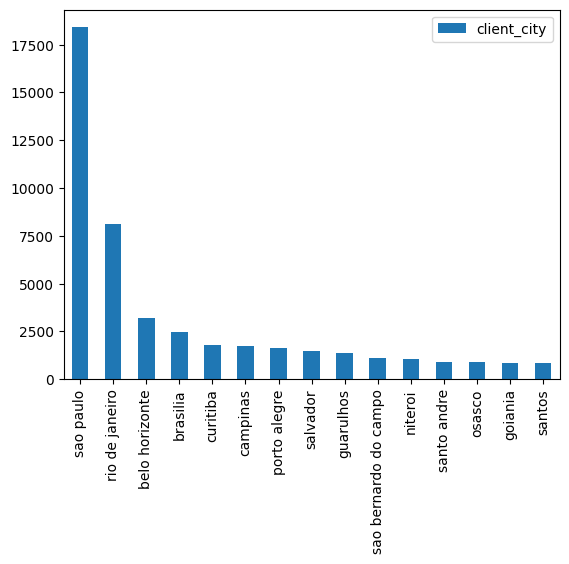

In [15]:
print("Cities that buys the most")
print(df_info_clients['client_city'].value_counts(normalize=False).head(10))
print(" ")
print("Percentage of cities that buys the most")
print(df_info_clients['client_city'].value_counts(normalize=True).head(10))
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
pd.DataFrame(df_info_clients['client_city'].value_counts(normalize=False).head(15)).plot(kind='bar')
plt.show()

In [16]:
print("There are "+ str(len(df_info_clients['client_city'].unique()))+" unique cities")
print("The city that sales the most is sao paulo with: " +str(df_info_clients['client_city'].value_counts(normalize=False).head(1).iloc[0])+" sales")
print("This represents "+str(round(df_info_clients['client_city'].value_counts(normalize=True).head(1).iloc[0]*100,2))+"%")

There are 4095 unique cities
The city that sales the most is sao paulo with: 18411 sales
This represents 15.8%


#### 3.1.3) State

There are 27 diferent states
 
Cities that buys the most
SP    49121
RJ    15182
MG    13527
RS     6433
PR     5908
SC     4254
BA     3994
DF     2467
GO     2396
ES     2332
Name: client_state, dtype: int64
 
Percentage of cities that buys the most
SP    0.421430
RJ    0.130253
MG    0.116054
RS    0.055191
PR    0.050687
SC    0.036497
BA    0.034266
DF    0.021165
GO    0.020556
ES    0.020007
Name: client_state, dtype: float64


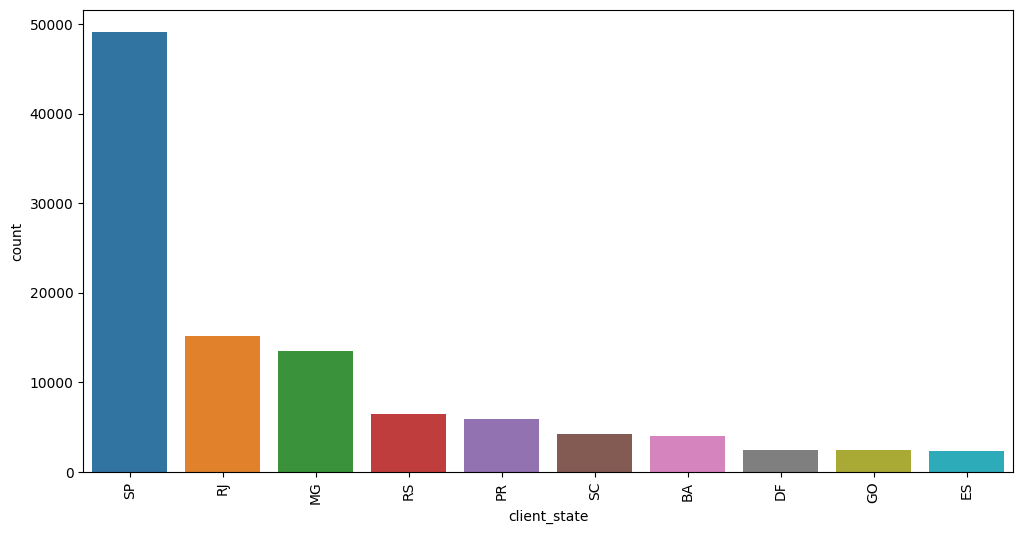

In [17]:
print("There are "+str(len(df_info_clients['client_state'].unique()))+" diferent states")
print(" ")
print("Cities that buys the most")
print(df_info_clients['client_state'].value_counts(normalize=False).head(10))
print(" ")
print("Percentage of cities that buys the most")
print(df_info_clients['client_state'].value_counts(normalize=True).head(10))
plt.figure(figsize=(12, 6))
sns.countplot(data=df_info_clients, x="client_state", order = df_info_clients['client_state'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.show()

In [18]:
print("The Southeast correspond to " +
      str(round(len(df_info_clients[ (df_info_clients['client_state']=='SP') | (df_info_clients['client_state']=='MG') | 
                              (df_info_clients['client_state']=='RJ') | (df_info_clients['client_state']=='ES')])/len(df_info_clients),2))+
                              "% of the total sales")

The Southeast correspond to 0.69% of the total sales


#### 3.1.4) Months

In [19]:
# convert the order_date column to a datetime type
df_info_clients['order_date'] = pd.to_datetime(df_info_clients['order_date'])

       date  order_per_month
0   2016-09                3
1   2016-10              384
2   2016-12                1
3   2017-01             1008
4   2017-02             2002
5   2017-03             3134
6   2017-04             2783
7   2017-05             4340
8   2017-06             3756
9   2017-07             4811
10  2017-08             5143
11  2017-09             5054
12  2017-10             5542
13  2017-11             8962
14  2017-12             6442
15  2018-01             8382
16  2018-02             7898
17  2018-03             8453
18  2018-04             8194
19  2018-05             8176
20  2018-06             7369
21  2018-07             7294
22  2018-08             7426
23  2018-09                1


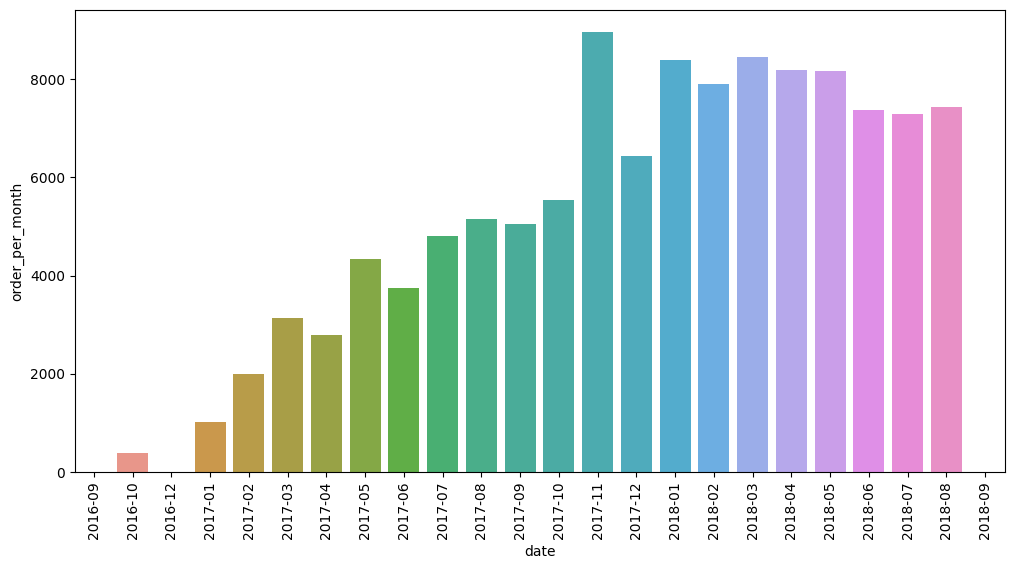

In [20]:
# group the rows by year-month of order_date column and count the ids for each year-month
result = df_info_clients.groupby(df_info_clients['order_date'].dt.strftime('%Y-%m'))['id'].count().reset_index()

# rename the columns of the result dataframe
result = result.rename(columns={'order_date': 'date', 'id': 'order_per_month'})

print(result)
plt.figure(figsize=(12, 6))
sns.barplot(data=result, x="date", y="order_per_month")
plt.xticks(rotation=90)
plt.show()

#query = """
#select strftime('%Y-%m',order_date) as date,
#count(id) as order_per_month
#from df_info_clients
#group by date
#"""

#print(ps.sqldf(query, locals()))
#plt.figure(figsize=(12, 6))
#sns.barplot(data=ps.sqldf(query, locals()), x="date", y="order_per_month")
#plt.xticks(rotation=90)
#plt.show()

#### 3.1.5) Years

   date  order_per_year
0  2016             388
1  2017           52977
2  2018           63193


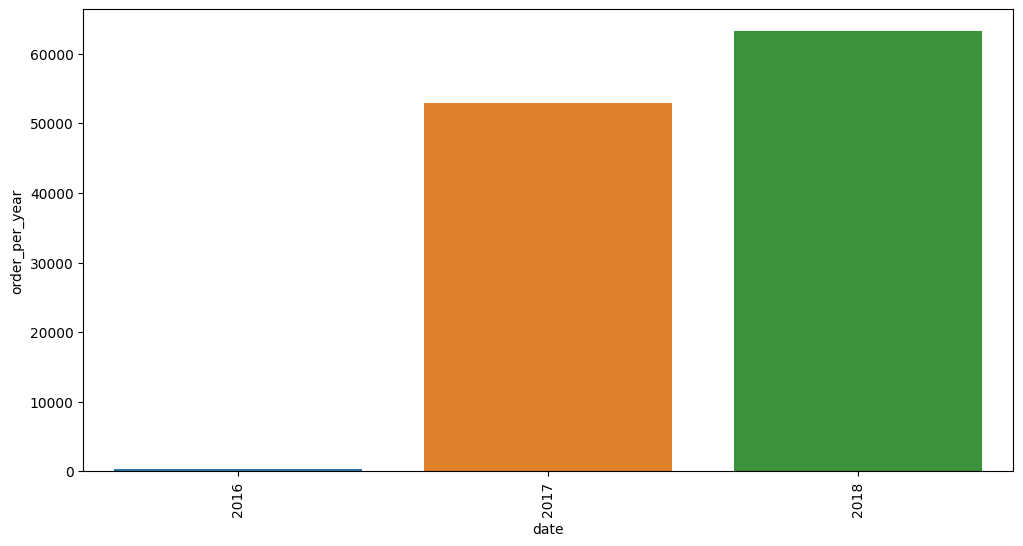

In [21]:
#query = """
#select strftime('%Y',order_date) as date,
#count(id) as order_per_year
#from df_info_clients
#group by date
#"""

#print(ps.sqldf(query, locals()))
#plt.figure(figsize=(12, 6))
#sns.barplot(data=ps.sqldf(query, locals()), x="date", y="order_per_year")
#plt.xticks(rotation=90)
#plt.show()


# group the rows by year of order_date column and count the ids for each year
result = df_info_clients.groupby(df_info_clients['order_date'].dt.strftime('%Y'))['id'].count().reset_index()

# rename the columns of the result dataframe
result = result.rename(columns={'order_date': 'date', 'id': 'order_per_year'})

print(result)
plt.figure(figsize=(12, 6))
sns.barplot(result, x="date", y="order_per_year")
plt.xticks(rotation=90)
plt.show()

#### 3.1.6) Category

There are 71 diferent categories
 
Most saled categories
bed_bath_table           11989
health_beauty            10030
sports_leisure            9002
furniture_decor           8829
computers_accessories     8150
housewares                7380
watches_gifts             6211
telephony                 4724
garden_tools              4589
auto                      4399
Name: category_english, dtype: int64
 
Percentage most saled categories
bed_bath_table           0.102859
health_beauty            0.086052
sports_leisure           0.077232
furniture_decor          0.075748
computers_accessories    0.069922
housewares               0.063316
watches_gifts            0.053287
telephony                0.040529
garden_tools             0.039371
auto                     0.037741
Name: category_english, dtype: float64


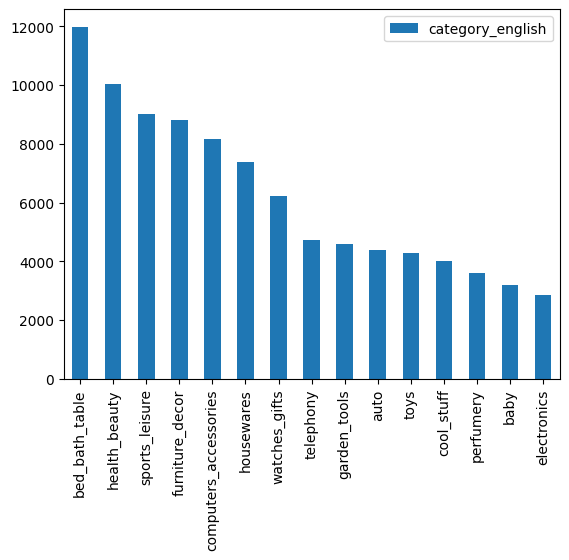

In [22]:
print("There are "+str(len(df_info_clients['category_english'].unique()))+" diferent categories")
print(" ")
print("Most saled categories")
print(df_info_clients['category_english'].value_counts(normalize=False).head(10))
print(" ")
print("Percentage most saled categories")
print(df_info_clients['category_english'].value_counts(normalize=True).head(10))


pd.DataFrame(df_info_clients['category_english'].value_counts(normalize=False).head(15)).plot(kind='bar')
plt.show()


# 6) Classifying your customers
Classifying customers may assist you to streamline your sales activities and help you focus on achieving the desired business goals. The ABC method is the most commonly used.

A - represents the ‘top grade’ or ‘ideal’ client in your business. They are 20% of the clients and generate more than 80% of the biling.

B - is a brilliant business customer. Represent 15% of the billing and they are 30% of the clients

C - low revelance for the business. The majority of the cliets correspond to only 5% of the revenue


In [74]:
print("There are "+ str(len(df_info_clients)) + " sales and")
print( str(len(df_info_clients['client_id'].unique())) + " clients bought more than once, that is, " + str(round((len(df_info_clients['client_id'].unique())/len(df_info_clients))*100,2)) +"%")

There are 116558 sales and
97233 clients bought more than once, that is, 83.42%


In [62]:
df_info_clients['client_id'].value_counts(normalize=False).head(15)

270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
63b964e79dee32a3587651701a2b8dbf    24
d22f25a9fadfb1abbc2e29395b1239f4    24
2ba91e12e5e4c9f56b82b86d9031d329    24
86cc80fef09f7f39df4b0dbce48e81cb    24
6ee2f17e3b6c33d6a9557f280edd2925    24
be1c4e52bb71e0c54b11a26b8e8d59f2    22
b246eeed30b362c09d867b9e598bee51    22
50920f8cd0681fd86ebe93670c8fe52e    21
fc3d1daec319d62d49bfb5e1f83123e9    21
5e0f7317756669ff7b384444dbb81fa3    21
bd5d39761aa56689a265d95d8d32b8be    20
Name: client_id, dtype: int64

### 3.2) Numerical variables

In order to make our job easier, I am going to define some functions of statistics and graphs

In [23]:
def statistics(df_column):
    column_mean = df_column.mean()
    column_median = df_column.median()
    column_std = df_column.std()
    column_min = df_column.min()
    column_max = df_column.max()
    column_skew = df_column.skew()
    column_kutosis = df_column.kurtosis()
    
    stats = pd.DataFrame([column_mean, column_median, column_std, column_min, column_max, column_skew, column_kutosis]).T
    stats.columns = ['mean', 'median', 'std', 'min', 'max', 'skew', 'kurtosis']
    
    return stats

In [24]:
def histogram(df_column):
    plt.figure(figsize=(12, 6))
    return sns.histplot(df_column)

#### 3.1) Order's Price 

In [25]:
statistics(df_info_clients['order_price'])

,mean,median,std,min,max,skew,kurtosis
0,120.749041,74.9,183.86179,0.85,6735.0,7.860769,118.931619


<Axes: ylabel='Count'>

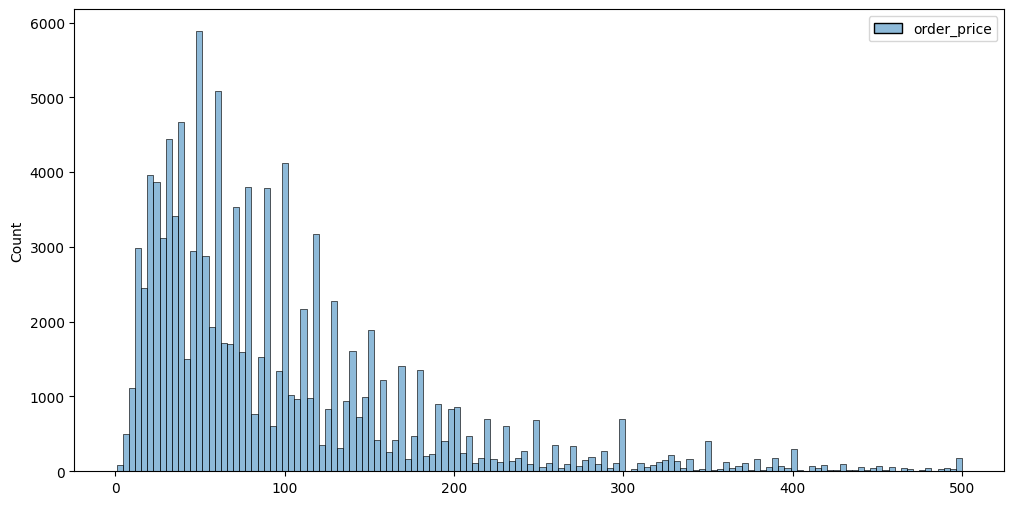

In [26]:
histogram(df_info_clients[df_info_clients['order_price']<500][['order_price']])

#### 3.2)Delivery Price

In [27]:
statistics(df_info_clients['delivery_price'])

,mean,median,std,min,max,skew,kurtosis
0,20.062962,16.32,15.846783,0.0,409.68,5.550551,57.94742


<Axes: ylabel='Count'>

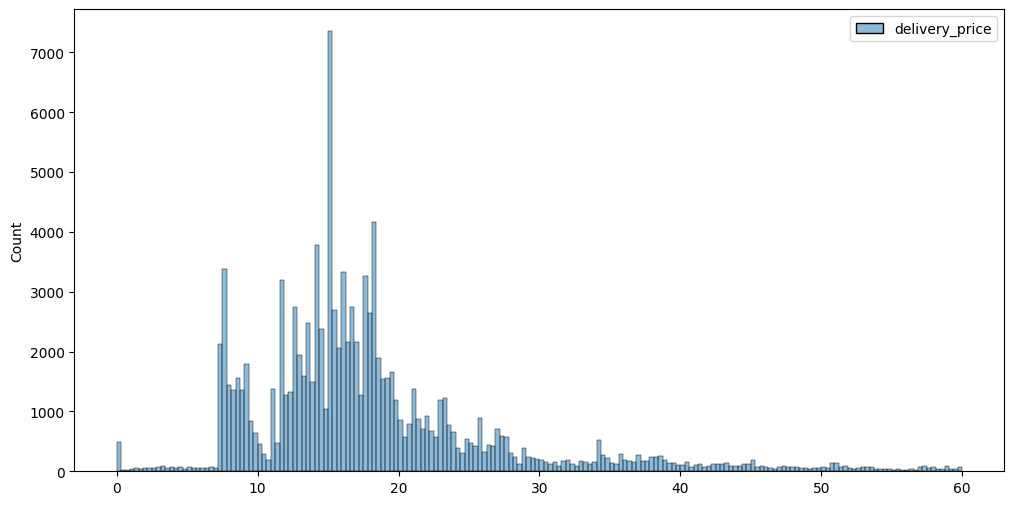

In [28]:
histogram(df_info_clients[df_info_clients['delivery_price']<60][['delivery_price']])

#### 3.3)Total Price 

In [29]:
statistics(df_info_clients['total_price'])

,mean,median,std,min,max,skew,kurtosis
0,172.913586,108.185,267.645592,0.0,13664.08,14.142156,511.025141


<Axes: ylabel='Count'>

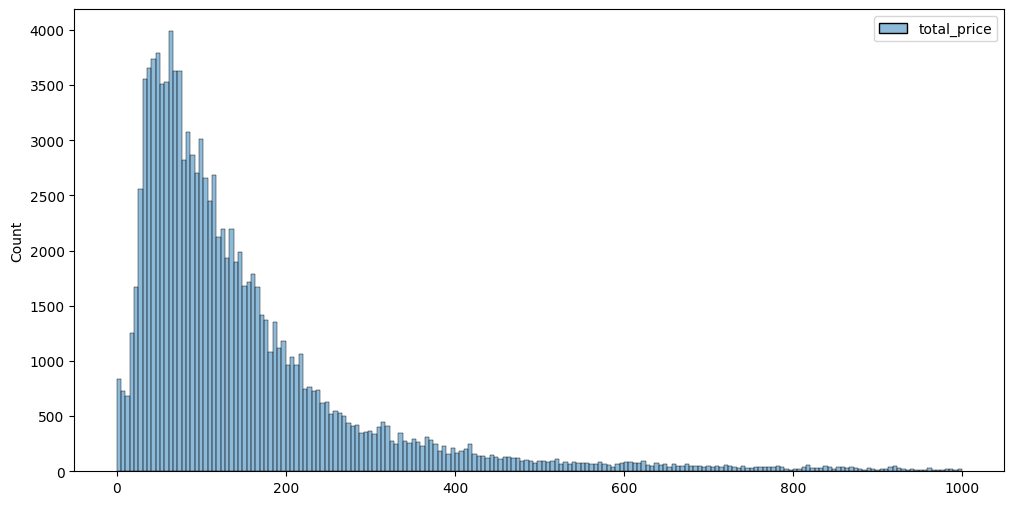

In [30]:
histogram(df_info_clients[df_info_clients['total_price']<1000][['total_price']])

#### 3.4) Review

In [31]:
statistics(df_info_clients['review'])

,mean,median,std,min,max,skew,kurtosis
0,4.017433,5.0,1.397936,1.0,5.0,-1.247712,0.128458


In [32]:
print("Count of the star rating reviews")
df_info_clients['review'].value_counts(normalize=False)

Count of the star rating reviews


5    65464
4    22012
1    15109
3     9841
2     4132
Name: review, dtype: int64

In [33]:
print("Percentage of the star rating reviews")
df_info_clients['review'].value_counts(normalize=True)

Percentage of the star rating reviews


5    0.561643
4    0.188850
1    0.129626
3    0.084430
2    0.035450
Name: review, dtype: float64

<Axes: xlabel='review', ylabel='Count'>

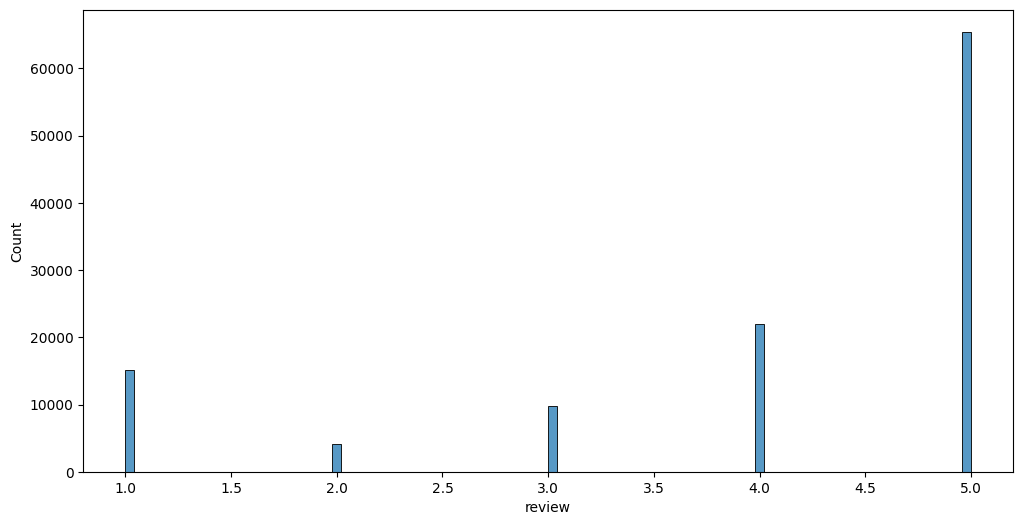

In [34]:
histogram(df_info_clients['review'])

In [35]:
print(str(df_info_clients['review'].value_counts(normalize=False).sum()) +' clients rated the order and ' + str(df_info_clients['id'].count()) + ' clients made an order in this period, that, 100% of the clients rated the order')

116558 clients rated the order and 116558 clients made an order in this period, that, 100% of the clients rated the order


#### 3.5) Parcels Pay

In [36]:
df_info_clients['divided_pay'].value_counts(normalize=False)

1     58012
2     13515
3     11651
4      7924
10     6867
5      5982
8      5055
6      4587
7      1804
9       724
12      166
15       93
18       38
24       34
11       25
20       21
13       19
14       16
17        7
16        7
21        6
0         3
23        1
22        1
Name: divided_pay, dtype: int64

# 4. Hypothesis 

#### 4.1) Creating Hypothesis

#### Which group of customers should we send each marketing campaign?

- Clients living in southeast of Brazil are more likely to buy more products.


#### How to define which products should appear as a suggestion for each type of customer?

- The correlation between category and the client's city

- The correlation between category and the client's state


#### How can we increase the sales conversion?

- Sales that were delivered quicker has a better rating review

- Sales with lower delivery prices has a better rating review

- Sales with no develivery expenses are more likely to be bought

- Sales that were delivered after the estimated date has a lower rating

- Bed, bath, table, heath and beauty are more likely to be bought 

- The clients are more likely to buy near holidays such as christmas

# 5) Bivariate Analysis

#### 5.1) Define statistical functions

In [37]:
def statistics_bi (col1, col2, df):
    x_mean = df[[col1, col2]].groupby([col1]).mean().reset_index().sort_values(by = [col1])
    x_count = df[[col1, col2]].groupby([col1]).count().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_median = df[[col1, col2]].groupby([col1]).median().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_std = df[[col1, col2]].groupby([col1]).std().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_min = df[[col1, col2]].groupby([col1]).min().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_max = df[[col1, col2]].groupby([col1]).max().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_skew = df[[col1, col2]].groupby([col1]).skew().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_sum = df[[col1, col2]].groupby([col1]).sum().reset_index().sort_values(by = [col1]).iloc[:,1]
    
    x_stats = pd.concat( [x_mean, x_median, x_std, x_min, x_max, x_skew, x_sum, x_count], axis = 1)
    x_stats.columns = [col1,'mean', 'median', 'std', 'min', 'max', 'skew', 'sum', 'count']
    return x_stats
    

#### 5.2) State X Price
The correlation between the order's price and the geographic state

In [38]:
print("The Southeast correspond to " +
      str(round((df_info_clients['order_price'][ (df_info_clients['client_state']=='SP') | (df_info_clients['client_state']=='MG') | 
                              (df_info_clients['client_state']=='RJ') | (df_info_clients['client_state']=='ES')].sum())/df_info_clients['order_price'].sum(),2))+
                              "% of the total sales")

The Southeast correspond to 0.65% of the total sales


In [39]:
print("States with higher revenue: ")
statistics_bi ('client_state', 'order_price', df_info_clients).sort_values(by = ['sum'], ascending=False).head(5)

States with higher revenue: 


,client_state,mean,median,std,min,max,skew,sum,count
25,SP,109.935826,69.9,164.794615,0.85,6499.00,8.372039,5400157.72,49121
18,RJ,124.920677,79.9,187.845505,0.85,4799.00,7.160773,1896545.72,15182
10,MG,120.190454,75.9,178.714278,3.85,4099.99,7.519731,1625816.27,13527
22,RS,121.477110,75.0,178.521694,3.06,3124.00,6.480374,781462.25,6433
17,PR,118.520140,72.5,178.304732,2.90,2999.99,6.774623,700216.99,5908


In [40]:
print("States that but more expensive products: ")
statistics_bi ('client_state', 'order_price', df_info_clients).sort_values(by = ['mean'], ascending=False).head(5)

States that but more expensive products: 


,client_state,mean,median,std,min,max,skew,sum,count
14,PB,192.103016,99.97,330.928220,4.9,4590.00,6.734694,121024.90,630
0,AC,182.715484,99.99,221.334038,12.9,1200.00,2.674972,16992.54,93
1,AL,180.653581,99.99,243.664548,9.0,1798.00,3.281845,82739.34,458
26,TO,166.885988,89.99,249.973399,8.5,2649.99,5.248355,55739.92,334
19,RN,166.423575,97.00,234.757908,10.0,1788.00,3.496541,94029.32,565


<Figure size 1200x600 with 0 Axes>

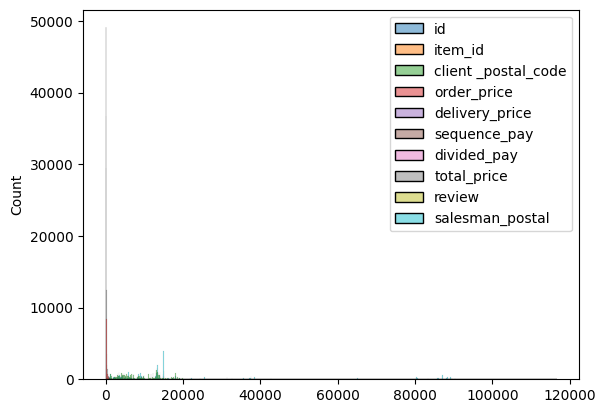

<Figure size 1200x600 with 0 Axes>

In [41]:
sns.histplot(df_info_clients[df_info_clients['client_state']=='SP'])
plt.figure(figsize=(12, 6))

#### 5.3) City Capital X Price

In [42]:
df_capitals = pd.read_csv('data/capital.csv')
df_capitals.head()

,Capitais,Estados,Siglas dos estados,Regiões
0,aracaju,Sergipe,SE,Nordeste
1,belem,Pará,PA,Norte
2,belo horizonte,Minas Gerais,MG,Sudeste
3,boa vista,Roraima,RR,Norte
4,braslia,Distrito Federal,DF,Centro-Oeste


In [43]:
df_only_capitals = df_info_clients.loc[df_info_clients['client_city'].isin(df_capitals['Capitais'])].reset_index(drop=True)

In [44]:
print('The capitals represent ' + 
      str(round(df_only_capitals['id'].count()/df_info_clients['id'].count(),4)*100) + 
      '% of the total orders')

print('The capitals represent ' + 
      str(round(df_only_capitals['order_price'].sum()/df_info_clients['order_price'].sum(),2)*100) + 
      '% of the total spent ')

The capitals represent 35.8% of the total orders
The capitals represent 36.0% of the total spent 


In [45]:
print("Capitals with the higher revenue")
statistics_bi('client_city', 'order_price', df_only_capitals).sort_values(by = ['sum'], ascending=False).head(10)

Capitals with the higher revenue


,client_city,mean,median,std,min,max,skew,sum,count
23,sao paulo,108.135525,67.90,163.812849,1.20,4399.87,7.493866,1990883.15,18411
20,rio de janeiro,126.106060,79.90,192.616447,5.30,3930.00,6.623424,1024107.31,8121
2,belo horizonte,112.906541,69.99,162.660013,4.90,3099.00,6.689155,363333.25,3218
6,curitiba,120.752991,69.90,191.152565,2.90,2999.99,6.777059,217234.63,1799
16,porto alegre,118.245518,79.00,144.303608,5.99,1934.00,5.283671,193922.65,1640
21,salvador,128.918451,79.90,179.904010,5.20,2951.00,6.027207,193119.84,1498
9,goiania,132.189800,79.90,192.714680,6.25,2299.95,5.410136,112625.71,852
8,fortaleza,137.248699,79.99,184.134333,7.80,1890.00,4.811982,103348.27,753
18,recife,131.218169,79.90,206.247039,6.99,3700.00,9.169411,91721.50,699
7,florianopolis,130.192783,71.00,222.748952,5.99,3109.99,7.202499,87489.55,672


#### 5.4) Southeast Cities X Price

In [46]:
df_SE = df_info_clients[df_info_clients['client_state'].isin(['SP', 'RJ', 'MG', 'ES'])] 

In [47]:
statistics_bi('client_city', 'order_price', df_SE).sort_values(by = ['count'], ascending=False).head(5)

,client_city,mean,median,std,min,max,skew,sum,count
1395,sao paulo,108.135525,67.90,163.812849,1.20,4399.87,7.493866,1990883.15,18411
1207,rio de janeiro,126.106060,79.90,192.616447,5.30,3930.00,6.623424,1024107.31,8121
157,belo horizonte,112.906541,69.99,162.660013,4.90,3099.00,6.689155,363333.25,3218
265,campinas,113.402474,66.99,167.875505,4.90,1999.99,5.540527,195279.06,1722
573,guarulhos,110.863453,74.90,145.896416,4.99,1999.00,5.810638,153767.61,1387


In [48]:
statistics_bi('client_city', 'order_price', df_SE).sort_values(by = ['mean'], ascending=False).head(5)


,client_city,mean,median,std,min,max,skew,sum,count
472,engenheiro navarro,1997.0000,1997.00,NaN,1997.0,1997.00,NaN,1997.00,1
194,bonfinopolis de minas,1359.9000,1359.90,NaN,1359.9,1359.90,NaN,1359.90,1
145,barra longa,1300.0000,1300.00,NaN,1300.0,1300.00,NaN,1300.00,1
135,barao ataliba nogueira,1300.0000,1300.00,NaN,1300.0,1300.00,NaN,1300.00,1
185,bom jesus do galho,1198.8225,271.65,1935.820586,152.0,4099.99,1.989496,4795.29,4


In [49]:
print('The Southeast cities represent ' + 
      str(round(df_SE['id'].count()/df_info_clients['id'].count(),4)*100) + 
      '% of the total orders')

print('The Southeast cities represent ' + 
      str(round(df_SE['order_price'].sum()/df_info_clients['order_price'].sum(),2)*100) + 
      '% of the total spent ')

print('The Southeast has ' + 
      str(df_info_clients['client_city'].drop_duplicates().count()) + 
      ' different cities ')

The Southeast cities represent 68.77% of the total orders
The Southeast cities represent 65.0% of the total spent 
The Southeast has 4095 different cities 


#### 5.5) Sales that were delivered quicker has a better rating review

In [50]:
#calculate the number of days unit the delivery
df_info_clients['order_approved'] = pd.to_datetime(df_info_clients['order_approved'])
df_info_clients['order_delivery'] = pd.to_datetime(df_info_clients['order_delivery'])
df_info_clients['days_until_delivery']  = (df_info_clients['order_delivery'] - df_info_clients['order_approved']).dt.days

<Axes: xlabel='days_until_delivery', ylabel='Count'>

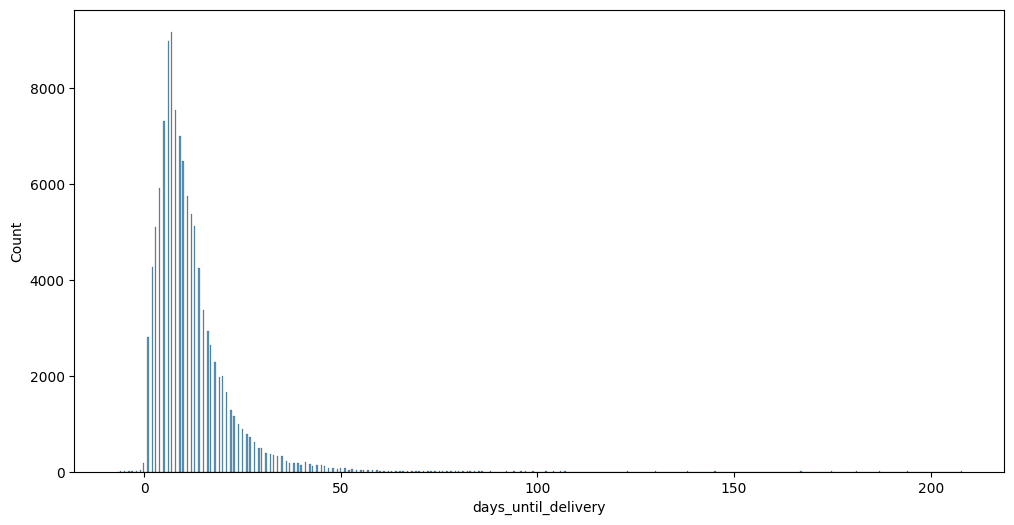

In [51]:
histogram(df_info_clients['days_until_delivery'])

<Axes: xlabel='days_until_delivery', ylabel='Percent'>

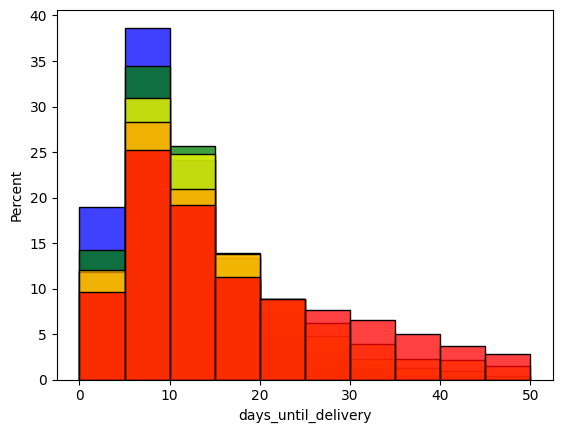

In [52]:
sns.histplot(df_info_clients[df_info_clients['review']==5]['days_until_delivery'], bins = 10, binrange = (0,50), color= 'blue', stat= 'percent')
sns.histplot(df_info_clients[df_info_clients['review']==4]['days_until_delivery'], bins = 10, binrange = (0,50), color= 'green', stat= 'percent')
sns.histplot(df_info_clients[df_info_clients['review']==3]['days_until_delivery'], bins = 10, binrange = (0,50), color= 'yellow', stat= 'percent')
sns.histplot(df_info_clients[df_info_clients['review']==2]['days_until_delivery'], bins = 10, binrange = (0,50), color= 'orange', stat= 'percent')
sns.histplot(df_info_clients[df_info_clients['review']==1]['days_until_delivery'], bins = 10, binrange = (0,50), color= 'red', stat= 'percent')

#### 5.6) Sales with no develivery expenses are more likely to be bought

In [53]:
print("Only "+str(round(len(df_info_clients[df_info_clients['delivery_price'] == 0]) / len(df_info_clients),3))+" % of the orders had free delivery")

Only 0.003 % of the orders had free delivery


FALSE

#### 5.7) Sales that were delivered after the estimated date has a lower rating

In [54]:
#calculate the number of days unit the delivery
df_info_clients['order_estimated'] = pd.to_datetime(df_info_clients['order_estimated'])
df_info_clients['days after the delivered date'] = (df_info_clients['order_delivery'] - df_info_clients['order_estimated']).dt.days


In [55]:
print(str(len(df_info_clients[df_info_clients['days after the delivered date']>0]))+ " encomendas atrasaram")
print("ou seja, "+ str(round(len(df_info_clients[df_info_clients['days after the delivered date']>0]) / len(df_info_clients),2))+"%")

7436 encomendas atrasaram
ou seja, 0.06%


<Axes: xlabel='review', ylabel='Percent'>

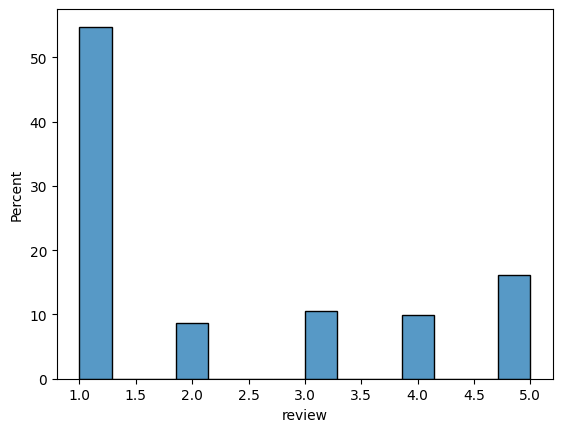

In [56]:
df_info_clients['review'][df_info_clients['days after the delivered date']>0].value_counts()
sns.histplot(df_info_clients['review'][df_info_clients['days after the delivered date']>0], stat= 'percent')

# Variable Analysis